# Testing the Freindship Paradox 

The freindship paradox is a phemonimon found in the study of social networks, where netwrok science has been applied to the study of social structures. Simply put the clkaim of the freimndship paradox is that for a given individual (node) within a network, their freinds (conncted nodes) will on average have more fiernds than them.

While the title freidship paradox encsisarily applys tghis logic to social relations, this is a broader phenomina of netweoks that can eb found in the analysis of different complex systems. 

In [8]:
import networkx as nx 
import numpy as np

## Generating Random Graphs

We can use a series of functions to generae a random graph with edges connecting nodes within the graph depending on the specified level of proabability. Within the function below a graph is initialised with a specified number of nodes and then edges between these nodes are created using the specified probablity. 

In [9]:
## Random Grap Function 

# all_pairs to map all potential edges 
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

# random_pairs uses flip:
def flip(p):
    return np.random.random() < p

# create random edges 
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

# Make_random_graph generates and returns the ER graph G(n, p):
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G 

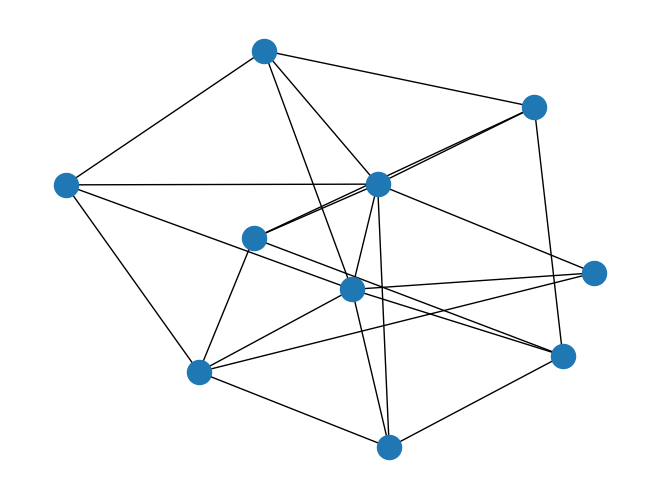

In [10]:
graph = make_random_graph(10, 0.5)
nx.draw(graph)

This can also simply be done using the `nx.erdos_renyi_graph(n,p)` function that is already provided in the `networkx` library. But building ourr own helps us to understand how a random graph is generated.

## Defining network functions

In order to test the freinship paradox we need to be able to tests the characteristics of networks, such as the degree for particular nodes. While this is simple enough to use built in functions provided by libraries such as `NetworkX`, building eh functions that perform theses ourselves helps to build a more intuative understanding.

In [11]:
G = graph

In [27]:
## Node degegree 

import statistics

def degrees(G):
    return [G.degree(node) for node in G]


def average_degree(G):
    degs = degrees(G)
    return np.mean(degs)






AttributeError: 'dict_keyiterator' object has no attribute 'degree'

## Testing The Paradox

In [ ]:
# Function to check the freinship paradox 

def freind_check(G):
    ave_deg = average_degree(graph)
    neigh_deg = nx.average_neighbor_degree(graph)
    ave_neigh_deg = np.mean(list(neigh_deg))

    if (ave_deg < ave_neigh_deg) :
        print("Your freinds havev more freinds than you do")
    else:
        print("Nice try")

freind_check(graph)

Nice try


In [ ]:
## Test of the freinship paradox


num_games = 1000
count = 0

for i in range(num_games):

    graph = make_random_graph(100, 0.1)
    
    average_degree = nx.average_degree_connectivity(graph)
    neigh_deg = nx.average_neighbor_degree(graph)
    ave_neigh_deg = np.mean(list(neigh_deg))

    if (ave_deg < ave_neigh_deg):
        count += 1

print(f"Your freinds have more freinds than you do {count / num_games:.1%} of the time")


NameError: name 'ave_deg' is not defined